# Notebook for exploration of the mean EEL field


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.precision", 4)

## 1. Load data into Dataframe

In [3]:
pathdir = '../data/raw'

# List available data files
import glob
listfiles= glob.glob(pathdir+'/'+'*.csv');
print(*listfiles, sep = "\n")


../data/raw/EELCTDandLADCP_refpos_origCTD.csv
../data/raw/EELCTDandLADCP_refdate.csv
../data/raw/EELCTDandLADCP_2Dfield.csv
../data/raw/EELCTDandLADCP_refpos_gvel.csv
../data/raw/EELCTDandLADCP_3Dfield.csv


#### Import 3D Fields

In [4]:
file1 = pathdir+'/'+'EELCTDandLADCP_3Dfield.csv'
df3D = pd.read_csv(file1,sep=',', index_col=None, 
                     header=0)
print(df3D)


      CruiseID Staname    Refdist  Depth     PTMP     PSAL   Sigma0  \
0       d22396    13G+  1186.1527     25  12.9947  35.1611  26.5186   
1       d22396    13G+  1186.1527     35  12.9717  35.1606  26.5229   
2       d22396    13G+  1186.1527     45  12.7560  35.1493  26.5563   
3       d22396    13G+  1186.1527     55  12.3461  35.1448  26.6325   
4       d22396    13G+  1186.1527     65  11.9363  35.1403  26.7087   
...        ...     ...        ...    ...      ...      ...      ...   
63894    dy078  IB22S+     6.7210     65   7.8667  35.0407  27.3261   
63895    dy078  IB22S+     6.7210     75   7.7710  35.0435  27.3424   
63896    dy078  IB22S+     6.7210     85   7.7483  35.0504  27.3512   
63897    dy078  IB22S+     6.7210     95   7.7317  35.0519  27.3548   
63898    dy078  IB22S+     6.7210    105   7.7190  35.0552  27.3593   

             Vrel  Vladcp    Vabs  Vladcpalong  
0      7.1146e-02 -0.0274  0.0317      -0.1860  
1      7.1017e-02 -0.0061  0.0316      -0.1952  


#### Import Metadata

In [5]:
# Date of each cruise
file2 = pathdir+'/'+'EELCTDandLADCP_refdate.csv'
dfdate = pd.read_csv(file2,sep=',', index_col=None, 
                     header=0)
print(dfdate)

   CruiseID  Year  Month
0    d22396  1996     10
1    d23097  1997      9
2    d23398  1998      5
3    d24299  1999      9
4    d24500  2000      2
5    d25301  2001     12
6   cd17605  2005     10
7    d31206  2006     10
8    d32107  2007      8
9    d34009  2009      6
10   d35110  2010      5
11   d36511  2011      5
12    jc086  2013      5
13    jr302  2014      7
14    dy031  2015      6
15    dy052  2016      6
16    dy078  2017      5


In [6]:
# Location of EEL stations
file3 = pathdir+'/'+'EELCTDandLADCP_refpos_gvel.csv'
dfloc = pd.read_csv(file3,sep=',', index_col=None, 
                     header=0)
print(dfloc)

   Staname    Refdist  RefLonGV  RefLatGV  RefDepthGV
0      1G+  1302.8994   -6.2080   56.6750       110.0
1      2G+  1295.3205   -6.3250   56.6955        50.0
2      3G+  1289.5191   -6.4085   56.7205        92.5
3      4G+  1282.0609   -6.5250   56.7330        97.5
4      5G+  1272.9178   -6.6750   56.7330        60.0
..     ...        ...       ...       ...         ...
63  IB18S+   103.0651  -19.7510   62.5000      1730.0
64  IB19S+    69.8213  -19.6095   62.7920      1535.0
65  IB20S+    40.4960  -19.7335   63.0250      1215.0
66  IB21S+    19.4086  -19.9915   63.1745       850.0
67  IB22S+     6.7210  -20.1410   63.2665       395.0

[68 rows x 5 columns]


<br><br>
## 2. Create Pivot Tables

In [7]:
df3D.groupby(['Staname','Depth'])["Vabs"].mean()

Staname  Depth
13G+     15      -0.0422
         25      -0.0056
         35      -0.0059
         45      -0.0054
         55      -0.0055
                   ...  
T+       65      -0.0187
         75      -0.0221
         85      -0.0605
         95      -0.0624
         105     -0.0635
Name: Vabs, Length: 6517, dtype: float64

In [8]:
df_MVabs = df3D.pivot_table(values="Vabs", index="Depth", columns="Staname")
print(df_MVabs)

Staname    13G+    14G+    15G+     8G+     9G+      A+      B+      C+  \
Depth                                                                     
5           NaN     NaN     NaN     NaN     NaN -0.0604  0.0985  0.0729   
15      -0.0422 -0.0383 -0.0582  0.0468 -0.0220 -0.0255 -0.0010  0.0246   
25      -0.0056  0.0195  0.0156  0.0489 -0.0169 -0.0283 -0.0042  0.0409   
35      -0.0059  0.0191  0.0125  0.0472 -0.0085 -0.0282 -0.0049  0.0399   
45      -0.0054  0.0194  0.0111  0.0418 -0.0221 -0.0289 -0.0115  0.0441   
...         ...     ...     ...     ...     ...     ...     ...     ...   
2645        NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2655        NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2665        NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2675        NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
2685        NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

Staname      D+      E+ 

<br><br>  
## 3. Sort the dataframe columns according to additional metadata (e.g. distance of reference along the section)
##### To reorganise the columns of the pivot table according to the distance of the station on the EEL section, we use dfloc to get the reference distance associated with the staname 'Refdist'

In [9]:
dfs = dfloc.sort_values('Refdist', ascending=True)
print(dfs)

   Staname    Refdist  RefLonGV  RefLatGV  RefDepthGV
67  IB22S+     6.7210  -20.1410   63.2665       395.0
66  IB21S+    19.4086  -19.9915   63.1745       850.0
65  IB20S+    40.4960  -19.7335   63.0250      1215.0
64  IB19S+    69.8213  -19.6095   62.7920      1535.0
63  IB18S+   103.0651  -19.7510   62.5000      1730.0
..     ...        ...       ...       ...         ...
4      5G+  1272.9178   -6.6750   56.7330        60.0
3      4G+  1282.0609   -6.5250   56.7330        97.5
2      3G+  1289.5191   -6.4085   56.7205        92.5
1      2G+  1295.3205   -6.3250   56.6955        50.0
0      1G+  1302.8994   -6.2080   56.6750       110.0

[68 rows x 5 columns]


\
List of the station name from the dataframe containing the 3D field

In [10]:
list1 = list(df_MVabs.columns) 
print(len(list1))

58


<br> List of the reference station from the metadata dataframe dfloc (sorted by distance):

In [11]:
list2 = list(zip(list(dfs.Staname),list(dfs.Refdist)))
print((list2))
print(f"\nLength: {len(list2)}")

[('IB22S+', 6.721022095564081), ('IB21S+', 19.4085773503411), ('IB20S+', 40.495970583094504), ('IB19S+', 69.8212652683242), ('IB18S+', 103.06513699024599), ('IB17+', 141.10058472554), ('IB16A+', 173.98659535060298), ('IB16+', 201.76659535060298), ('IB15+', 229.54659535060298), ('IB14+', 257.326595350603), ('IB13A+', 285.106595350603), ('IB13+', 312.886595350603), ('IB12A+', 340.66659535060296), ('IB12+', 368.44659535060305), ('IB11A+', 399.84832973158206), ('IB11+', 430.673460109097), ('IB10+', 468.663262611363), ('IB9+', 499.742154822881), ('IB8+', 518.528667699264), ('IB7+', 538.601559837495), ('IB6+', 562.949888472012), ('IB5+', 586.044619970636), ('IB4C+', 602.515916919915), ('IB4B+', 621.500630600615), ('IB4A+', 639.451050292806), ('IB4+', 656.552122245144), ('IB3A+', 677.7099024851401), ('IB3+', 701.779011653906), ('IB2A+', 727.5316762150329), ('IB2+', 755.276537301711), ('IB1A+', 781.137312284704), ('IB1+', 806.770168481099), ('A+', 828.7579703431089), ('B+', 846.952231455968), 

\
list2 has more elements than list1 because the station without enough sampling where not exported in the dataframe df3D (occupied less than 4 times)\
The elements of both lists can be display using the *zip()* function


In [12]:
print(list(zip(list1,list2)))
# # If rather have a list of list rather than a list of tuples :
# res = [[i, j] for i, j in zip(list1, list2)] 
# print(res)

[('13G+', ('IB22S+', 6.721022095564081)), ('14G+', ('IB21S+', 19.4085773503411)), ('15G+', ('IB20S+', 40.495970583094504)), ('8G+', ('IB19S+', 69.8212652683242)), ('9G+', ('IB18S+', 103.06513699024599)), ('A+', ('IB17+', 141.10058472554)), ('B+', ('IB16A+', 173.98659535060298)), ('C+', ('IB16+', 201.76659535060298)), ('D+', ('IB15+', 229.54659535060298)), ('E+', ('IB14+', 257.326595350603)), ('F+', ('IB13A+', 285.106595350603)), ('G+', ('IB13+', 312.886595350603)), ('H+', ('IB12A+', 340.66659535060296)), ('I+', ('IB12+', 368.44659535060305)), ('IB1+', ('IB11A+', 399.84832973158206)), ('IB10+', ('IB11+', 430.673460109097)), ('IB11+', ('IB10+', 468.663262611363)), ('IB11A+', ('IB9+', 499.742154822881)), ('IB12+', ('IB8+', 518.528667699264)), ('IB12A+', ('IB7+', 538.601559837495)), ('IB13+', ('IB6+', 562.949888472012)), ('IB13A+', ('IB5+', 586.044619970636)), ('IB14+', ('IB4C+', 602.515916919915)), ('IB15+', ('IB4B+', 621.500630600615)), ('IB16+', ('IB4A+', 639.451050292806)), ('IB16A+', 

\
If the two lists are of uneven length, it is better to use the function *itertools.zip_longest()* which  filled-in missing values

In [13]:
import itertools

print(list(itertools.zip_longest(list1,list2)))

[('13G+', ('IB22S+', 6.721022095564081)), ('14G+', ('IB21S+', 19.4085773503411)), ('15G+', ('IB20S+', 40.495970583094504)), ('8G+', ('IB19S+', 69.8212652683242)), ('9G+', ('IB18S+', 103.06513699024599)), ('A+', ('IB17+', 141.10058472554)), ('B+', ('IB16A+', 173.98659535060298)), ('C+', ('IB16+', 201.76659535060298)), ('D+', ('IB15+', 229.54659535060298)), ('E+', ('IB14+', 257.326595350603)), ('F+', ('IB13A+', 285.106595350603)), ('G+', ('IB13+', 312.886595350603)), ('H+', ('IB12A+', 340.66659535060296)), ('I+', ('IB12+', 368.44659535060305)), ('IB1+', ('IB11A+', 399.84832973158206)), ('IB10+', ('IB11+', 430.673460109097)), ('IB11+', ('IB10+', 468.663262611363)), ('IB11A+', ('IB9+', 499.742154822881)), ('IB12+', ('IB8+', 518.528667699264)), ('IB12A+', ('IB7+', 538.601559837495)), ('IB13+', ('IB6+', 562.949888472012)), ('IB13A+', ('IB5+', 586.044619970636)), ('IB14+', ('IB4C+', 602.515916919915)), ('IB15+', ('IB4B+', 621.500630600615)), ('IB16+', ('IB4A+', 639.451050292806)), ('IB16A+', 

\
Using list comprehension and the *enumerate()* function to sort list1 elements according to list2 order:

In [14]:
list_r = [[c,values,xref] for xref in list2 for c,values in enumerate(list1,0) if values == xref[0]] 
print(f"Reorder list:  {list_r}") 

Reorder list:  [[33, 'IB22S+', ('IB22S+', 6.721022095564081)], [32, 'IB21S+', ('IB21S+', 19.4085773503411)], [31, 'IB20S+', ('IB20S+', 40.495970583094504)], [28, 'IB19S+', ('IB19S+', 69.8212652683242)], [27, 'IB18S+', ('IB18S+', 103.06513699024599)], [26, 'IB17+', ('IB17+', 141.10058472554)], [25, 'IB16A+', ('IB16A+', 173.98659535060298)], [24, 'IB16+', ('IB16+', 201.76659535060298)], [23, 'IB15+', ('IB15+', 229.54659535060298)], [22, 'IB14+', ('IB14+', 257.326595350603)], [21, 'IB13A+', ('IB13A+', 285.106595350603)], [20, 'IB13+', ('IB13+', 312.886595350603)], [19, 'IB12A+', ('IB12A+', 340.66659535060296)], [18, 'IB12+', ('IB12+', 368.44659535060305)], [17, 'IB11A+', ('IB11A+', 399.84832973158206)], [16, 'IB11+', ('IB11+', 430.673460109097)], [15, 'IB10+', ('IB10+', 468.663262611363)], [45, 'IB9+', ('IB9+', 499.742154822881)], [44, 'IB8+', ('IB8+', 518.528667699264)], [43, 'IB7+', ('IB7+', 538.601559837495)], [42, 'IB6+', ('IB6+', 562.949888472012)], [41, 'IB5+', ('IB5+', 586.04461997

\
Get the sorting index *ista* from the reordererd list *list_r*:

In [15]:
ista = [item[0] for item in list_r]
print(ista)

[33, 32, 31, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 30, 29, 14, 5, 6, 7, 8, 9, 10, 11, 12, 13, 46, 47, 48, 49, 50, 51, 52, 54, 53, 55, 56, 2, 57, 1, 0, 4, 3]


\
Get the reference distance corresponding to the sorting index *ista* from the reordererd list *list_r*:

In [16]:
refdist = [item[2][1] for item in list_r]
print(refdist)

[6.721022095564081, 19.4085773503411, 40.495970583094504, 69.8212652683242, 103.06513699024599, 141.10058472554, 173.98659535060298, 201.76659535060298, 229.54659535060298, 257.326595350603, 285.106595350603, 312.886595350603, 340.66659535060296, 368.44659535060305, 399.84832973158206, 430.673460109097, 468.663262611363, 499.742154822881, 518.528667699264, 538.601559837495, 562.949888472012, 586.044619970636, 602.515916919915, 621.500630600615, 639.451050292806, 656.552122245144, 677.7099024851401, 701.779011653906, 727.5316762150329, 755.276537301711, 781.137312284704, 806.770168481099, 828.7579703431089, 846.952231455968, 865.903377149661, 879.863313261289, 890.849674734066, 909.356986908352, 932.842121461985, 954.295750175461, 970.2888628784061, 983.859226148175, 997.9493492185719, 1011.2464449563499, 1026.8050079407199, 1046.77417036539, 1068.9500750927, 1089.42707658295, 1101.72574213887, 1108.37380704328, 1118.82460680132, 1133.0844192792802, 1149.57371459129, 1164.6089689691498,

\
Display sorted pivot table

In [17]:
sdf_MVabs = df_MVabs.iloc[:,ista]
print(sdf_MVabs.head())


Staname  IB22S+  IB21S+  IB20S+  IB19S+  IB18S+   IB17+  IB16A+   IB16+  \
Depth                                                                     
5        0.0594  0.0067  0.0495 -0.0266     NaN     NaN -0.0436  0.0174   
15       0.0019  0.0241  0.0602 -0.0530 -0.0670 -0.0502 -0.0732 -0.0065   
25       0.0020  0.0245  0.0473 -0.0390 -0.0630 -0.0542 -0.0708 -0.0067   
35       0.0033  0.0231  0.0482 -0.0402 -0.0636 -0.0539 -0.0714 -0.0068   
45       0.0050  0.0214  0.0490 -0.0415 -0.0643 -0.0534 -0.0719 -0.0071   

Staname   IB15+   IB14+  ...     Q1+      Q+      R+      S+    15G+      T+  \
Depth                    ...                                                   
5           NaN     NaN  ...  0.1157  0.1177  0.1197     NaN     NaN     NaN   
15      -0.0409 -0.0530  ...  0.0942  0.1050  0.1077  0.0003 -0.0582 -0.0597   
25      -0.0421 -0.0525  ...  0.0609  0.1075  0.1202  0.0531  0.0156 -0.0206   
35      -0.0433 -0.0523  ...  0.0631  0.1093  0.1203  0.0526  0.0125 -0.01

\
## 4. Load and sort other variables the same way

In [18]:
print(df3D.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63899 entries, 0 to 63898
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   CruiseID     63899 non-null  object 
 1   Staname      63899 non-null  object 
 2   Refdist      63899 non-null  float64
 3   Depth        63899 non-null  int64  
 4   PTMP         63899 non-null  float64
 5   PSAL         63899 non-null  float64
 6   Sigma0       63899 non-null  float64
 7   Vrel         63899 non-null  float64
 8   Vladcp       63899 non-null  float64
 9   Vabs         63899 non-null  float64
 10  Vladcpalong  63899 non-null  float64
dtypes: float64(8), int64(1), object(2)
memory usage: 5.4+ MB
None


In [19]:
# Calculate standard deviation for the Absolute geostrophic velocity
df_SDVabs = df3D.pivot_table(values="Vabs", index="Depth", columns="Staname",aggfunc=np.std)
sdf_SDVabs = df_SDVabs.iloc[:,ista]

# Calculate Mean and standard deviation for the direct velocity measured by LADCP
sdf_MVladcp = df3D.pivot_table(values="Vladcp", index="Depth", columns="Staname",aggfunc=np.mean).iloc[:,ista]
sdf_SDVladcp = df3D.pivot_table(values="Vladcp", index="Depth", columns="Staname",aggfunc=np.std).iloc[:,ista]

# Calculate Mean and standard deviation for the geostrophic velocity relative to a level of no motion
sdf_MVrel = df3D.pivot_table(values="Vrel", index="Depth", columns="Staname",aggfunc=np.mean).iloc[:,ista]
sdf_SDVrel = df3D.pivot_table(values="Vrel", index="Depth", columns="Staname",aggfunc=np.std).iloc[:,ista]

# Calculate Mean and standard deviation for the potential temperature
sdf_MPTMP = df3D.pivot_table(values="PTMP", index="Depth", columns="Staname",aggfunc=np.mean).iloc[:,ista]
sdf_SDPTMP = df3D.pivot_table(values="PTMP", index="Depth", columns="Staname",aggfunc=np.std).iloc[:,ista]

# Calculate Mean and standard deviation for the salinity
sdf_MSAL = df3D.pivot_table(values="PSAL", index="Depth", columns="Staname",aggfunc=np.mean).iloc[:,ista]
sdf_SDSAL = df3D.pivot_table(values="PSAL", index="Depth", columns="Staname",aggfunc=np.std).iloc[:,ista]

# Calculate Mean and standard deviation for the potential density
sdf_MSigma0 = df3D.pivot_table(values="Sigma0", index="Depth", columns="Staname",aggfunc=np.mean).iloc[:,ista]
sdf_SDSigma0 = df3D.pivot_table(values="Sigma0", index="Depth", columns="Staname",aggfunc=np.std).iloc[:,ista]



\
### Create a list of the variable to be plotted on contourf subplots

In [123]:
# Create list of dictionaries for variable to plot on the figure with 4x2 subpanels:
# The rows of the figure correpsond to variable (Velocity, Temperature, Salinity, Density) while the columns correspond to the mean and standard deviation

vartoplot=[
    # 1st List correspond to first row of the 4x2 plot (Absolute Velocity)
    [{'Var':'LADCP Vel.', 
      'Type':'Mean', 
      'Data':sdf_MVladcp*100, 
      'cf_levels':np.arange(-16, 20, 4),
      'c_levels':[0,0],
      'cmap':'coolwarm',
      'pltitle':'Mean LADCP Velocity',
      'cbtitle':'cm/s'}, 
     
     {'Var':'LADCP Vel.', 
      'Type':'Std', 
      'Data':sdf_SDVladcp*100,
      'cf_levels':np.arange(0, 18, 4),
      'cmap':'OrRd',
      'pltitle':'STD LADCP Velocity',
      'cbtitle':'cm/s'}
    ],
    
    # 2nd List correspond to 2nd row of the 4x2 plot (Temperature)
    [{'Var':'Pot. Temp.', 
      'Type':'Mean', 
      'Data':sdf_MPTMP, 
      'cf_levels':np.arange(3, 11, 1),
      'cmap':'plasma',
      'pltitle':'Mean Potential Temperature',
      'cbtitle':'$^\circ$C'}, 
     
     {'Var':'Pot. Temp.', 
      'Type':'Std', 
      'Data':sdf_SDPTMP,
      'cf_levels':np.arange(0, 1.2, 0.2),
      'cmap':'OrRd',
      'pltitle':'STD Potential Temperature',
      'cbtitle':'$^\circ$C'}
    ],  
    
   # 3rd List correspond to 3rd row of the 4x2 plot (Salinity)    
    [{'Var':'Sal.', 
      'Type':'Mean', 
      'Data':sdf_MSAL, 
      'cf_levels':np.arange(34.9, 35.45, 0.05),
      'cmap':'viridis',
      'pltitle':'Mean Pratical Salinity',
      'cbtitle':' '}, 
     
     {'Var':'Sal.', 
      'Type':'Std', 
      'Data':sdf_SDSAL,
      'cf_levels':np.arange(0, 0.12, 0.02),
      'cmap':'OrRd',
      'pltitle':'STD Pratical Salinity',
      'cbtitle':' '}
    ],  
    
   # 4th List correspond to 4th row of the 4x2 plot (Pot. Density)  
    [{'Var':'Pot. Dens. Ano.', 
      'Type':'Mean', 
      'Data':sdf_MSigma0, 
      'cf_levels':np.arange(27.2, 27.9, 0.1),
      'cmap':'cividis_r',
      'pltitle':'Mean Potential Density Anomaly',
      'cbtitle':'kg.m$^{-3}$'}, 
     
     {'Var':'Pot. Dens. Ano', 
      'Type':'Std', 
      'Data':sdf_SDSigma0,
      'cf_levels':np.arange(0, 0.12, 0.02),
      'cmap':'OrRd',
      'pltitle':'STD Potential Density Anomaly',
      'cbtitle':'kg.m$^{-3}$'}
    ], 
]


   
#### Some tests with the list of dictionary created

In [124]:
# Display dictionary entries for elements [0,0] 
print(vartoplot[0][0].keys())

# display a subset of key-values
key_list = ['Var','Type','cmap','pltitle','cbtitle']
[key + ": " + vartoplot[0][0].get(key) for key in key_list]

dict_keys(['Var', 'Type', 'Data', 'cf_levels', 'c_levels', 'cmap', 'pltitle', 'cbtitle'])


['Var: LADCP vel.',
 'Type: Mean',
 'cmap: coolwarm',
 'pltitle: Mean LADCP Velocity',
 'cbtitle: cm/s']

<br><br>  
## 5. Contourf plots

### a. For direct current measurements, temperature, salinity and density

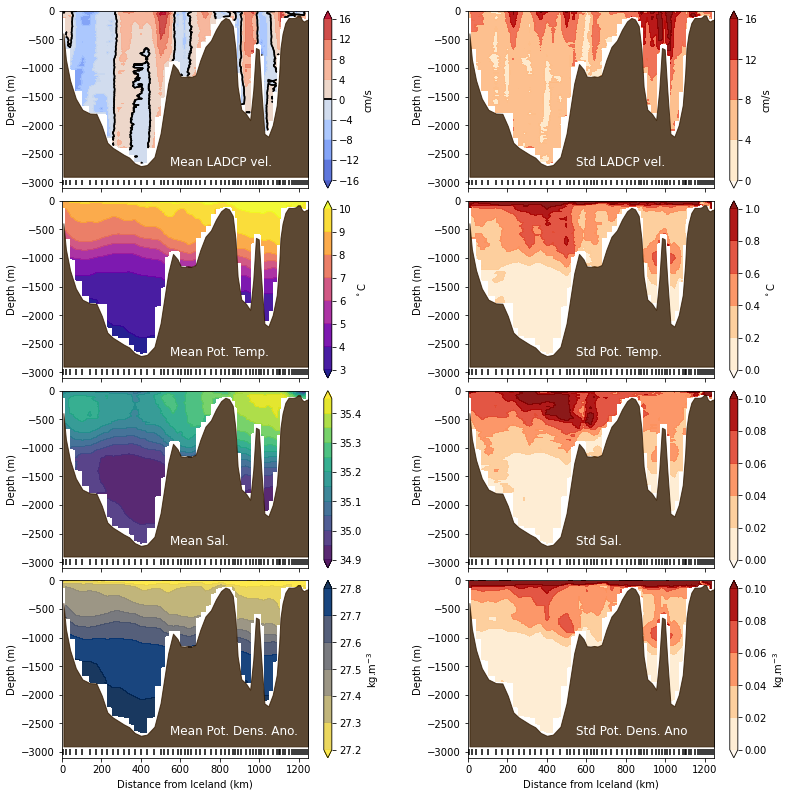

In [145]:
#plt.rcParams.update({'font.size': 10})
    
# Create the figure
## fig, axs = plt.subplots(4, 2, figsize=(12, 12), constrained_layout=True)
fig, axs = plt.subplots(4, 2, sharex=True, figsize=(11, 11))
for row in [0,1,2,3]:
    for col in [0,1]:

        VarDir = vartoplot[row][col]
        var = VarDir['Data'] 
        cf_levels = VarDir['cf_levels'] 
        colmap = getattr(plt.cm, VarDir['cmap'] )
#         if VarDir['cmap'] == 'cividis':
#             colmap = colmap[:-1,:]
        
        pltitle = VarDir['pltitle']
        plunits = VarDir['cbtitle']
        
        X=refdist
        Y=var.index.values
        Z=var.values
        Xi,Yi = np.meshgrid(X, Y)

        ax = axs[row, col]

        CS = ax.contourf(Xi, -Yi, Z, cf_levels, alpha=0.9, cmap=colmap, extend='both');
        
        if 'c_levels' in VarDir:
            c_levels = VarDir['c_levels'] 
            CS2 = ax.contour(CS, levels=c_levels, colors='k')


        ax.set_ylabel('Depth (m)')
        ax.set_xlim([0,1250]) 
        ax.set_ylim([-3100,0])    
        
        # ax.set_title(pltitle)
        ax.text(550, -2700, VarDir['Type']+' '+VarDir['Var'], fontsize=12, color ='white' )
            
        # Make a colorbar for the ContourSet returned by the contourf call.
        cbar = fig.colorbar(CS, ax=ax)
        cbar.ax.set_ylabel(plunits)
        #cbar.ax.set_ylabel('m/s')
                
        # Add the contour line levels to the colorbar
        if 'c_levels' in VarDir:        
            cbar.add_lines(CS2)

        # Add bathymetry (from the nominal depth of the reference EEL stations)
        ax.fill_between(dfs['Refdist'], -dfs['RefDepthGV'], -2900, color="#331a00", alpha=0.8)
        
        ax.vlines(dfs['Refdist'], -3050, -2950, colors='k')

        if row ==3:
            ax.set_xlabel('Distance from Iceland (km)')
            
plt.tight_layout(pad=0.5,w_pad=3)          
plt.savefig('figures/'+'02_figure4x2.pdf')       

### b. For and absolute geostrophic velocity, relative geostrophic velocity 

In [146]:
# Create 2nd list of dictionaries for variable to plot on the "diagnostic figure" comparing the mean and standard deviation from:
# 1) the mean LADCP velocity, 2) the geostrophic velocity relative to LoNM, 3) the absolute velocity (relative geostrophic velocity reference to depth-average LADCP)

vartoplot_diag=[
    # 1st List correspond to first row of the 3x2 plot (LADCP Velocity)
    [{'Var':'LADCP Vel.', 
      'Type':'Mean', 
      'Data':sdf_MVladcp*100, 
      'cf_levels':np.arange(-16, 20, 4),
      'c_levels':[0,0],
      'cmap':'coolwarm',
      'pltitle':'Mean LADCP Velocity',
      'cbtitle':'cm/s'}, 
     
     {'Var':'LADCP Vel.', 
      'Type':'Std', 
      'Data':sdf_SDVladcp*100,
      'cf_levels':np.arange(0, 18, 4),
      'cmap':'OrRd',
      'pltitle':'STD LADCP Velocity',
      'cbtitle':'cm/s'}
    ],

    # 2nd List correspond to 2nd row of the 3x2 plot (Relative Geostrophic Velocity)
    [{'Var':'Rel. Gvel.', 
      'Type':'Mean', 
      'Data':sdf_MVrel*100, 
      'cf_levels':np.arange(-16, 20, 4),
      'c_levels':[0,0],
      'cmap':'coolwarm',
      'pltitle':'Mean Relative Velocity',
      'cbtitle':'cm/s'}, 
     
     {'Var':'Abs. Gvel.', 
      'Type':'Std', 
      'Data':sdf_SDVrel*100,
      'cf_levels':np.arange(0, 18, 4),
      'cmap':'OrRd',
      'pltitle':'STD Relative Velocity',
      'cbtitle':'cm/s'}
    ],
    
    # 3rd List correspond to 3rd row of the 3x2 plot (Absolute Velocity)
    [{'Var':'Abs. Gvel.', 
      'Type':'Mean', 
      'Data':sdf_MVabs*100, 
      'cf_levels':np.arange(-16, 20, 4),
      'c_levels':[0,0],
      'cmap':'coolwarm',
      'pltitle':'Mean Absolute Velocity',
      'cbtitle':'cm/s'}, 
     
     {'Var':'Abs. Gvel.', 
      'Type':'Std', 
      'Data':sdf_SDVabs*100,
      'cf_levels':np.arange(0, 18, 4),
      'cmap':'OrRd',
      'pltitle':'STD Absolute Velocity',
      'cbtitle':'cm/s'}
    ],
]


Create figure for LADCP, relative geostrophic velocity and absolute geostrophic velocity

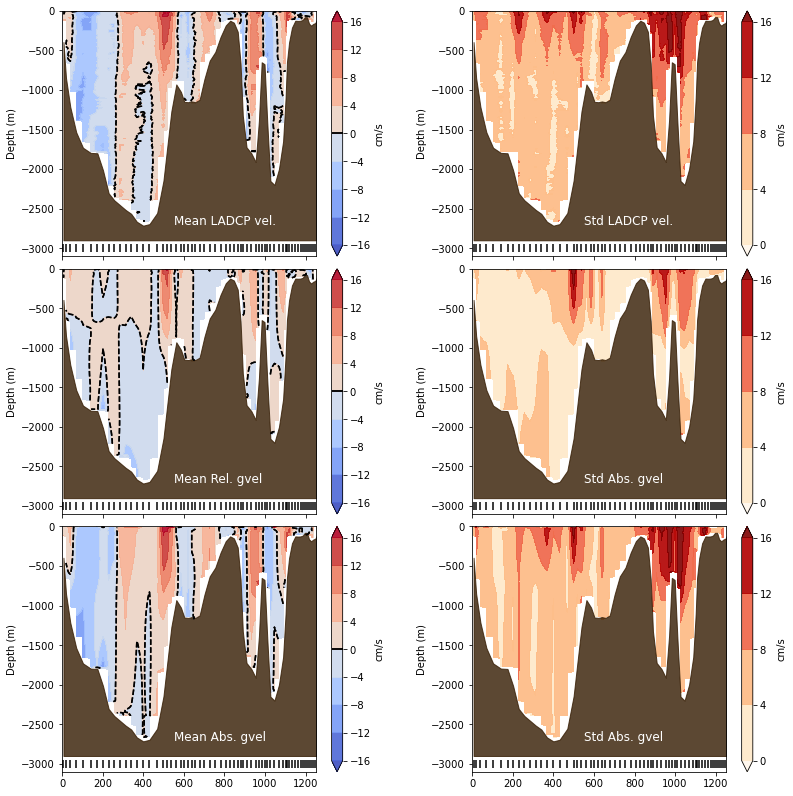

In [147]:
# Create Figure
fig, axs = plt.subplots(3,2, sharex=True, figsize=(11, 11))
for row in [0,1,2]:
    for col in [0,1]:

        VarDir = vartoplot_diag[row][col]
        var = VarDir['Data'] 
        cf_levels = VarDir['cf_levels'] 
        colmap = getattr(plt.cm, VarDir['cmap'] )
#         if VarDir['cmap'] == 'cividis':
#             colmap = colmap[:-1,:]
        
        pltitle = VarDir['pltitle']
        plunits = VarDir['cbtitle']
        
        X=refdist
        Y=var.index.values
        Z=var.values
        Xi,Yi = np.meshgrid(X, Y)

        ax = axs[row, col]

        CS = ax.contourf(Xi, -Yi, Z, cf_levels, alpha=0.9, cmap=colmap, extend='both');
        
        if 'c_levels' in VarDir:
            c_levels = VarDir['c_levels'] 
            CS2 = ax.contour(CS, levels=c_levels, colors='k',linestyles='dashed')


        ax.set_ylabel('Depth (m)')
        ax.set_xlim([0,1250]) 
        ax.set_ylim([-3100,0])    
        
        # ax.set_title(pltitle)
        ax.text(550, -2700, VarDir['Type']+' '+VarDir['Var'], fontsize=12, color ='white' )
            
        # Make a colorbar for the ContourSet returned by the contourf call.
        cbar = fig.colorbar(CS, ax=ax)
        cbar.ax.set_ylabel(plunits)
        #cbar.ax.set_ylabel('m/s')
                
        # Add the contour line levels to the colorbar
        if 'c_levels' in VarDir:        
            cbar.add_lines(CS2)

        # Add bathymetry (from the nominal depth of the reference EEL stations)
        ax.fill_between(dfs['Refdist'], -dfs['RefDepthGV'], -2900, color="#331a00", alpha=0.8)
        
        ax.vlines(dfs['Refdist'], -3050, -2950, colors='k')

        if row ==3:
            ax.set_xlabel('Distance from Iceland (km)')
            
plt.tight_layout(pad=0.5,w_pad=3)          
plt.savefig('figures/'+'02_figurediag3x2.pdf')       

TODO: Add depth of level of no motion on Relative geostrophic velocity plot